In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',200)
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
pd.set_option('display.max_columns', 70)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor, ExtraTreesRegressor
from pickle import dump

In [67]:
data=pd.read_csv('dataset.csv',index_col=0)

In [80]:
df = df.rename(columns={'LIMIT_BAL': 'limit_bal', 
                                        'SEX': 'sex', 
                                        'EDUCATION': 'education', 
                                        'MARRIAGE': 'marriage', 
                                        'AGE': 'age', 
                                        'PAY_0': 'pay_sept',
                                        'PAY_2': 'pay_aug',
                                        'PAY_3': 'pay_july',
                                        'PAY_4': 'pay_june',
                                        'PAY_5':'pay_may',
                                        'PAY_6':'pay_april',
                                        'BILL_AMT1':'bill_sept',
                                        'BILL_AMT2':'bill_aug',
                                        'BILL_AMT3':'bill_july',
                                        'BILL_AMT4':'bill_june',
                                        'BILL_AMT5':'bill_may',
                                        'BILL_AMT6':'bill_april',
                                        'PAY_AMT1':'pay_amt_sept',
                                        'PAY_AMT2':'pay_amt_aug',
                                        'PAY_AMT3':'pay_amt_july',
                                        'PAY_AMT4':'pay_amt_june',
                                        'PAY_AMT5':'pay_amt_may',
                                        'PAY_AMT6':'pay_amt_april',
                                        'default payment next month':'default',
                                        'marriage_2':'single',
                                        'marriage_3':'marriage_other',
                                        'edu_2':'edu_university',
                                        'edu_3':'edu_highschool',
                                        'edu_4':'edu_other'})

In [15]:
df.head()

,limit_bal,sex,education,marriage,age,pay_sept,pay_aug,pay_july,pay_june,pay_may,pay_april,bill_sept,bill_aug,bill_july,bill_june,bill_may,bill_april,pay_amt_sept,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,default
0,200000,2,3,1,30,2,2,2,2,2,2,140327,143137,145374,147273,149244,151973,6600,6000,5860,6000,5000,0,0
1,200000,2,4,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20000,2,2,2,28,0,0,2,0,0,0,2937,5696,4144,8168,6894,11424,3353,3,5101,6,6530,8103,1
3,50000,1,2,2,23,0,0,0,-1,0,0,51274,50474,49724,48437,18712,19129,4175,41000,51705,700,718,700,0
4,20000,1,2,1,47,-1,-1,-1,-2,-2,-2,390,780,0,0,0,0,780,0,0,0,0,0,0


In [69]:
df['marriage']=np.where(df['marriage']==0,3,df['marriage'])

In [70]:
df['marriage'].value_counts()

2    11942
1    10281
3      277
Name: marriage, dtype: int64

In [71]:
df['education']=np.where(df['education']==0,4,df['education'])
df['education']=np.where(df['education']==5,6,df['education'])
df['education']=np.where(df['education']==6,4,df['education'])


In [20]:
df['education'].value_counts()

2    10546
1     7921
3     3690
4      343
Name: education, dtype: int64

In [21]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_sept',
       'pay_aug', 'pay_july', 'pay_june', 'pay_may', 'pay_april', 'bill_sept',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'pay_amt_sept', 'pay_amt_aug', 'pay_amt_july', 'pay_amt_june',
       'pay_amt_may', 'pay_amt_april', 'default'],
      dtype='object')

In [22]:
df.drop(columns=['pay_sept','pay_aug','pay_june', 'pay_may', 'pay_april'],inplace=True)

In [23]:
df['pay_july']=np.where(df['pay_july']==-2,0,df['pay_july'])
df['pay_july']=np.where(df['pay_july']==-1,0,df['pay_july'])
df['pay_july']=np.where(df['pay_july']==2,1,df['pay_july'])
df['pay_july']=np.where(df['pay_july']==3,1,df['pay_july'])
df['pay_july']=np.where(df['pay_july']==4,1,df['pay_july'])
df['pay_july']=np.where(df['pay_july']==5,1,df['pay_july'])
df['pay_july']=np.where(df['pay_july']==6,1,df['pay_july'])
df['pay_july']=np.where(df['pay_july']==7,1,df['pay_july'])
df['pay_july']=np.where(df['pay_july']==8,1,df['pay_july'])

In [24]:
df['pay_july'].value_counts()

0    19357
1     3143
Name: pay_july, dtype: int64

In [81]:
df.head(50)

,limit_bal,sex,age,pay_sept,pay_aug,pay_july,pay_june,pay_may,pay_april,pay_amt_sept,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,default,bill_avg,single,marriage_other,edu_university,edu_highschool,edu_other
0,200000,2,30,2,2,2,2,2,2,6600,6000,5860,6000,5000,0,0,146221.333333,0,0,0,1,0
1,200000,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0.000000,1,0,0,0,1
2,20000,2,28,0,0,2,0,0,0,3353,3,5101,6,6530,8103,1,6543.833333,1,0,1,0,0
3,50000,1,23,0,0,0,-1,0,0,4175,41000,51705,700,718,700,0,39625.000000,1,0,1,0,0
4,20000,1,47,-1,-1,-1,-2,-2,-2,780,0,0,0,0,0,0,195.000000,0,0,1,0,0
5,400000,1,44,0,0,0,0,0,0,1216,1213,363,219,234,159,0,7616.666667,1,0,1,0,0
6,70000,2,22,0,-1,0,0,0,0,68209,2081,2000,2000,1828,1518,0,48826.000000,1,0,1,0,0
7,170000,1,38,0,0,0,0,0,-1,9900,83200,0,3006,132854,5003,0,151199.833333,0,0,1,0,0
8,20000,1,22,0,0,2,2,2,0,3000,0,3000,0,1000,400,0,19975.666667,1,0,1,0,0
9,60000,1,36,1,2,0,0,2,0,5200,3000,8500,0,4000,7000,0,63397.833333,1,0,0,0,0


In [72]:
df2=df[['bill_sept','bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april']]

In [73]:
df2['bill_avg']=df2.mean(axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
df_bill_avg=pd.DataFrame(df2['bill_avg'])

In [29]:
df_bill_avg

,bill_avg
0,146221.333333
1,0.000000
2,6543.833333
3,39625.000000
4,195.000000
...,...
22495,18788.500000
22496,38717.333333
22497,49479.166667
22498,123250.333333


In [75]:
df=pd.concat([df,df_bill_avg],axis=1)

In [76]:
df.drop(columns=['bill_sept','bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april'],inplace=True)

In [32]:
df.head()

,limit_bal,sex,education,marriage,age,pay_july,pay_amt_sept,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,default,bill_avg
0,200000,2,3,1,30,1,6600,6000,5860,6000,5000,0,0,146221.333333
1,200000,2,4,2,27,0,0,0,0,0,0,0,0,0.000000
2,20000,2,2,2,28,1,3353,3,5101,6,6530,8103,1,6543.833333
3,50000,1,2,2,23,0,4175,41000,51705,700,718,700,0,39625.000000
4,20000,1,2,1,47,0,780,0,0,0,0,0,0,195.000000


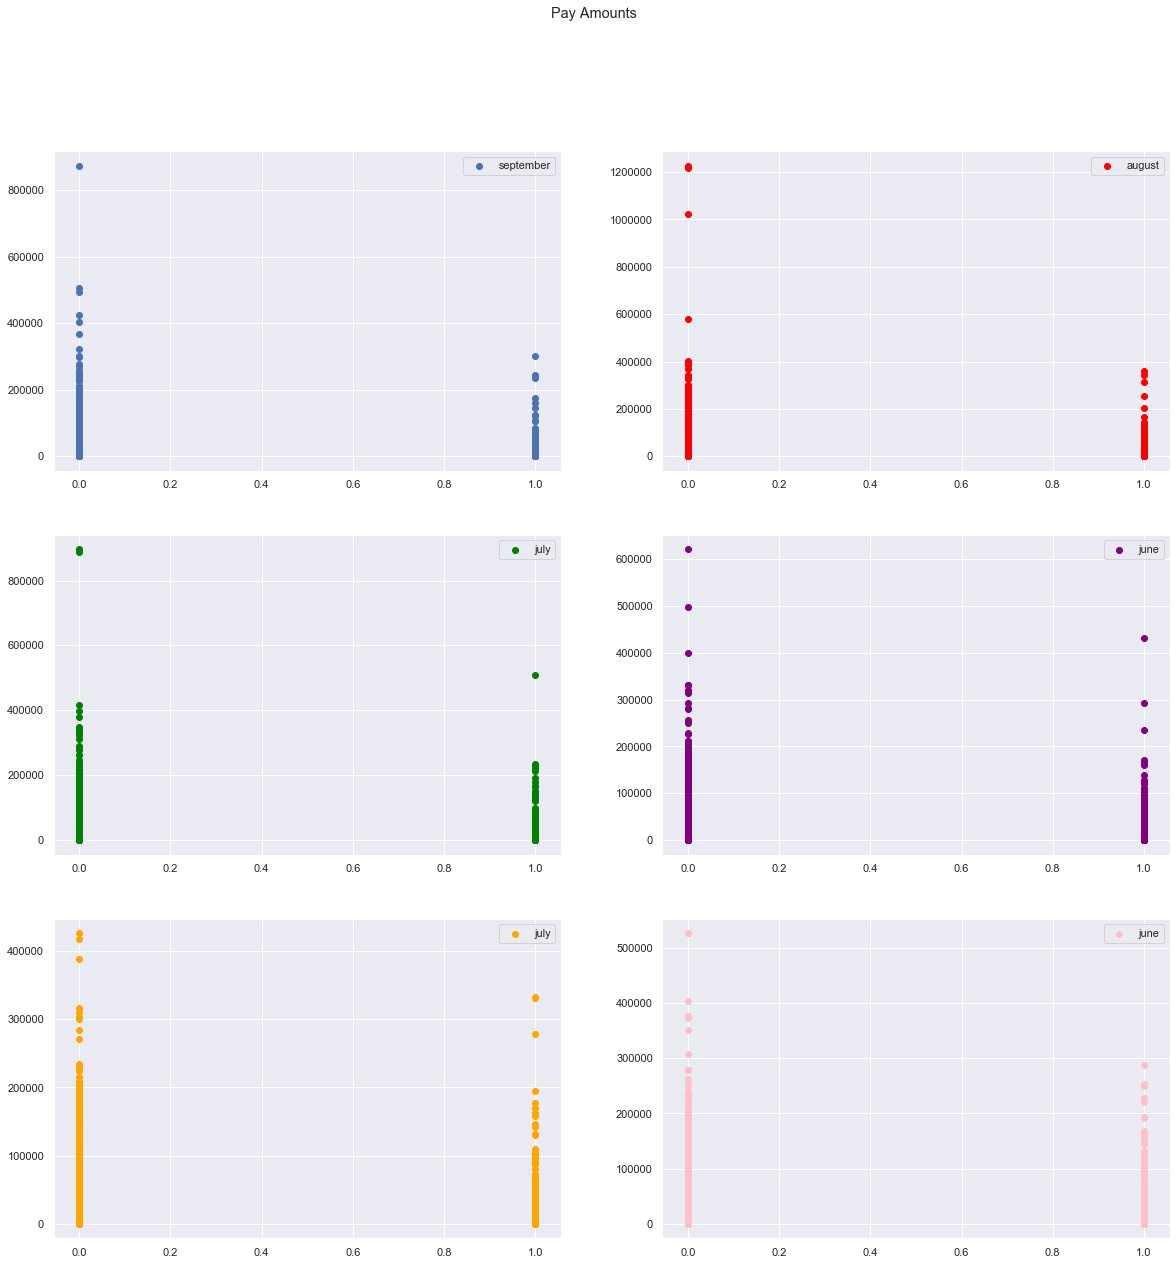

In [22]:
import seaborn as sns
sns.set()

plt.figure(1, figsize=(20,20))
plt.suptitle('Pay Amounts')
plt.subplot(321)
plt.scatter(df.default, df.pay_amt_sept, label='september')
plt.legend()
plt.subplot(322)
plt.scatter(df.default, df.pay_amt_aug, c='red', label='august')
plt.legend()
plt.subplot(323)
plt.scatter(df.default, df.pay_amt_july, c='green', label='july')
plt.legend()
plt.subplot(324)
plt.scatter(df.default, df.pay_amt_june, c='purple', label='june')
plt.legend()
plt.subplot(325)
plt.scatter(df.default, df.pay_amt_may, c='orange', label='july')
plt.legend()
plt.subplot(326)
plt.scatter(df.default, df.pay_amt_april, c='pink', label='june')
plt.legend()
plt.show()

In [33]:
df['pay_amt_sept_cap']=np.where((df['default'] == 1) & (df['pay_amt_sept'] > 200000),200000,df['pay_amt_sept'])
df['pay_amt_aug_cap']=np.where((df['default'] == 1) & (df['pay_amt_aug'] > 200000),200000,df['pay_amt_aug'])
df['pay_amt_july_cap']=np.where((df['default'] == 1) & (df['pay_amt_july'] > 200000),200000,df['pay_amt_july'])
df['pay_amt_june_cap']=np.where((df['default'] == 1) & (df['pay_amt_june'] > 200000),200000,df['pay_amt_june'])
df['pay_amt_may_cap']=np.where((df['default'] == 1) & (df['pay_amt_may'] > 200000),200000,df['pay_amt_may'])
df['pay_amt_april_cap']=np.where((df['default'] == 1) & (df['pay_amt_april'] > 200000),200000,df['pay_amt_april'])

In [24]:
df.head()

,limit_bal,sex,education,marriage,age,pay_july,pay_amt_sept,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,default,bill_avg,pay_amt_sept_cap,pay_amt_aug_cap,pay_amt_july_cap,pay_amt_june_cap,pay_amt_may_cap,pay_amt_april_cap
0,200000,2,3,1,30,1,6600,6000,5860,6000,5000,0,0,146221.333333,6600,6000,5860,6000,5000,0
1,200000,2,4,2,27,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0,0
2,20000,2,2,2,28,1,3353,3,5101,6,6530,8103,1,6543.833333,3353,3,5101,6,6530,8103
3,50000,1,2,2,23,0,4175,41000,51705,700,718,700,0,39625.000000,4175,41000,51705,700,718,700
4,20000,1,2,1,47,0,780,0,0,0,0,0,0,195.000000,780,0,0,0,0,0


In [77]:
marriage_dummy = pd.get_dummies(df['marriage'],prefix = 'marriage', drop_first=True)
df = pd.concat([df, marriage_dummy], axis = 1)

In [78]:
education_dummy = pd.get_dummies(df['education'],prefix = 'edu', drop_first=True)
df = pd.concat([df, education_dummy], axis = 1)

In [79]:
df.drop(columns=['education','marriage'],inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 0 to 22499
Data columns (total 23 columns):
limit_bal            22500 non-null int64
sex                  22500 non-null int64
age                  22500 non-null int64
pay_july             22500 non-null int64
pay_amt_sept         22500 non-null int64
pay_amt_aug          22500 non-null int64
pay_amt_july         22500 non-null int64
pay_amt_june         22500 non-null int64
pay_amt_may          22500 non-null int64
pay_amt_april        22500 non-null int64
default              22500 non-null int64
bill_avg             22500 non-null float64
pay_amt_sept_cap     22500 non-null int64
pay_amt_aug_cap      22500 non-null int64
pay_amt_july_cap     22500 non-null int64
pay_amt_june_cap     22500 non-null int64
pay_amt_may_cap      22500 non-null int64
pay_amt_april_cap    22500 non-null int64
single               22500 non-null uint8
marriage_other       22500 non-null uint8
edu_university       22500 non-null uint8
edu_hig

In [40]:
df.shape

(22500, 23)

In [82]:
df

,limit_bal,sex,age,pay_sept,pay_aug,pay_july,pay_june,pay_may,pay_april,pay_amt_sept,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,default,bill_avg,single,marriage_other,edu_university,edu_highschool,edu_other
0,200000,2,30,2,2,2,2,2,2,6600,6000,5860,6000,5000,0,0,146221.333333,0,0,0,1,0
1,200000,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0.000000,1,0,0,0,1
2,20000,2,28,0,0,2,0,0,0,3353,3,5101,6,6530,8103,1,6543.833333,1,0,1,0,0
3,50000,1,23,0,0,0,-1,0,0,4175,41000,51705,700,718,700,0,39625.000000,1,0,1,0,0
4,20000,1,47,-1,-1,-1,-2,-2,-2,780,0,0,0,0,0,0,195.000000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,50000,2,50,0,0,0,0,0,0,2000,1306,1206,1000,697,532,0,18788.500000,0,0,1,0,0
22496,80000,2,53,0,0,0,0,0,0,2530,3990,850,800,1100,1100,0,38717.333333,0,0,1,0,0
22497,50000,2,50,0,0,0,0,0,0,2070,2357,1746,1628,1520,2202,0,49479.166667,0,0,1,0,0
22498,220000,1,32,0,0,0,0,0,0,3746,3820,4000,4000,4000,4500,0,123250.333333,0,0,1,0,0


In [41]:
df2=df.drop(columns=['pay_amt_sept','pay_amt_aug','pay_amt_july','pay_amt_june','pay_amt_april','pay_amt_may'])

In [42]:
df2.shape

(22500, 17)

In [143]:
df.to_csv('data.csv')

In [83]:
from sklearn.model_selection import train_test_split

y = df['default']
X = df.drop(['default'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [84]:
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

In [85]:
logreg = LogisticRegression(class_weight='balanced')

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
#penalty is lasso or ridge regularization
# c refers to the amount of regularization
penalty = ['l1', 'l2']
c_range = [0.001, 0.01, 0.1, 1, 10, 100]
solver=['liblinear', 'saga']
parameters = dict(C=c_range, penalty=penalty,solver=solver)

lr=GridSearchCV(logreg,parameters,scoring='f1',cv=7,verbose=1)

In [86]:
lr.fit(X_train_scaled,y_train)

Fitting 7 folds for each of 24 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:   15.0s finished


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [87]:
# examine the best model
print(lr.best_score_)
print(lr.best_params_)
print(lr.best_estimator_)

0.5037630053113139
{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


In [88]:
#predict 
y_pred_lr=lr.best_estimator_.predict(X_test_scaled)

In [89]:
#f1 score for test
metrics.f1_score(y_pred_lr,y_test)

0.5059288537549407

In [53]:
results ={}

results['log_grid_scaled_df2']=metrics.f1_score(y_pred_lr,y_test)

In [78]:
results

{'log_grid_scaled_df2': 0.43750000000000006}

In [95]:


metrics.classification_report(y_pred_lr,y_test,output_dict=True)

{'0': {'precision': 0.7828571428571428,
  'recall': 0.8438038925843804,
  'f1-score': 0.8121887597818355,
  'support': 4059},
 '1': {'precision': 0.4928,
  'recall': 0.3933588761174968,
  'f1-score': 0.43750000000000006,
  'support': 1566},
 'accuracy': 0.7184,
 'macro avg': {'precision': 0.6378285714285714,
  'recall': 0.6185813843509386,
  'f1-score': 0.6248443798909178,
  'support': 5625},
 'weighted avg': {'precision': 0.7021052342857143,
  'recall': 0.7184,
  'f1-score': 0.7078754090585725,
  'support': 5625}}

In [113]:
#create a dictionary of all the parameters you want to tune
#grid search with RFC
param_grid = { 
    'max_depth': [5,7],
    'n_estimators': [700,900],
    'max_features': [16,18,21],
    'min_samples_leaf': [4,6],
}

In [114]:
#create a grid search object and fit it to the data
rfc2=RandomForestClassifier(class_weight='balanced')
grid_rfc=GridSearchCV(rfc2,param_grid,cv=3,scoring='f1',n_jobs=-1,verbose=1)
grid_rfc.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 11.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [116]:
### Identify the best params 

print(grid_rfc.best_score_)
print(grid_rfc.best_params_)
print(grid_rfc.best_estimator_)


0.534745479168562
{'max_depth': 7, 'max_features': 16, 'min_samples_leaf': 4, 'n_estimators': 700}
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features=16,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=700, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


In [117]:
#predict on the test set
y_pred_grid=grid_rfc.best_estimator_.predict(X_test_scaled)

# F1 for test predictions
print("F1:",metrics.f1_score(y_test, y_pred_grid))


F1: 0.5390226112326768


In [156]:
print("Acc:",metrics.accuracy_score(y_test, y_pred_grid))

Acc: 0.7752888888888889


In [163]:
#rfc test, without gridsearch
rfc_only=RandomForestClassifier(class_weight='balanced',n_estimators=800,max_features=16,max_depth=7,min_samples_leaf=4)

In [164]:
rfc_only.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features=16,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=800, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [165]:
y_pred_rfc=rfc_only.predict(X_test_scaled)
print("F1:",metrics.f1_score(y_test, y_pred_rfc))

F1: 0.5422740524781341


In [166]:
print("Acc:",metrics.accuracy_score(y_test, y_pred_rfc))

Acc: 0.7767111111111111


In [97]:
df.columns

Index(['limit_bal', 'sex', 'age', 'pay_sept', 'pay_aug', 'pay_july',
       'pay_june', 'pay_may', 'pay_april', 'pay_amt_sept', 'pay_amt_aug',
       'pay_amt_july', 'pay_amt_june', 'pay_amt_may', 'pay_amt_april',
       'default', 'bill_avg', 'single', 'marriage_other', 'edu_university',
       'edu_highschool', 'edu_other'],
      dtype='object')

In [146]:
bc_lr = BaggingClassifier(
            base_estimator=lr.best_estimator_, 
            n_estimators= 400,max_samples=.6
        )

In [147]:
bc_lr.fit(X_train_scaled,y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=0.001,
                                                    class_weight='balanced',
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l1',
                                                    random_state=None,
                                                    solver='saga', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.6, n_estimators=400, n_jobs

In [148]:
bc_lr_preds = bc_lr.predict(X_test_scaled)

bc_lr_f1 = metrics.f1_score(y_test, bc_lr_preds)

print(bc_lr_f1)

0.5059288537549407


In [149]:
param_grid_bc_g={'max_features':[8,12,16]}

grid_bc_lr=GridSearchCV(bc_lr,param_grid_bc_g,cv=5,scoring='f1',n_jobs=-1,verbose=1)

In [150]:
grid_bc_lr.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=0.001,
                                                                           class_weight='balanced',
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=100,
                                                                           multi_class='warn',
                                                                           n_jobs=None,
                                                                           penalty='l1',
                                   

In [151]:
print(grid_bc_lr.best_score_)
print(grid_bc_lr.best_params_)
print(grid_bc_lr.best_estimator_)

0.5038369333788492
{'max_features': 12}
BaggingClassifier(base_estimator=LogisticRegression(C=0.001,
                                                    class_weight='balanced',
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l1',
                                                    random_state=None,
                                                    solver='saga', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=12,
                  ma

In [53]:
#df3=pd.read_csv('all_data.csv',index_col=0)

In [54]:
#df_test=df3.drop(columns=['pay_amt_sept_cap','pay_amt_aug_cap','pay_amt_july_cap','pay_amt_june_cap','pay_amt_may_cap','pay_amt_april_cap'])

In [154]:
#ensemble method, combine predictions from multiple models
voting_clf = VotingClassifier(
                estimators=[('logreg', lr.best_estimator_), ('randomforest', rfc_only)], 
                voting='hard')

voting_clf.fit(X_train_scaled, y_train)

vc_preds = voting_clf.predict(X_test_scaled)

vc_f1 = metrics.f1_score(y_test, vc_preds)

print(vc_f1)

0.51524259338772
